In [1]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as pyplot

In [2]:
add_health = pd.read_csv("add_health.csv", low_memory=False)

In [3]:
# Data Management
# Sacred texts agreement question: 
#replace answers in sacred texts to nan
add_health['H1RE2'] = add_health['H1RE2'].replace(6, np.NaN)
add_health['H1RE2'] = add_health['H1RE2'].replace(8, np.NaN)
#if has no religion replace with the value disagree
add_health['H1RE2'] = add_health['H1RE2'].replace(7, 2)

#howm important is religion for you
add_health['H1RE4'] = add_health['H1RE4'].replace(6, np.NaN)
add_health['H1RE4'] = add_health['H1RE4'].replace(8, np.NaN)
#if has no religion replace with the value not important
add_health['H1RE4'] = add_health['H1RE4'].replace(7, 4)

#how often do you pray
add_health['H1RE6'] = add_health['H1RE6'].replace(6, np.NaN)
add_health['H1RE6'] = add_health['H1RE6'].replace(8, np.NaN)
#if has no religion replace with the value never
add_health['H1RE6'] = add_health['H1RE6'].replace(7, 5)


In [4]:
#Mom motivates you to be independant
add_health['H1PF2'] = add_health['H1PF2'].replace(6, np.NaN)
add_health['H1PF2'] = add_health['H1PF2'].replace(8, np.NaN)
add_health['H1PF2'] = add_health['H1PF2'].replace(7, np.NaN)

#How much you feel that people in your family understand you
add_health['H1PR5'] = add_health['H1PR5'].replace(6, np.NaN)
add_health['H1PR5'] = add_health['H1PR5'].replace(96, np.NaN)
add_health['H1PR5'] = add_health['H1PR5'].replace(98, np.NaN)


In [5]:
#Parents give you right to decide different aspects of your life: H1WP1 -> H1WP7
#I will combine these columns 5 and more Yes -> encourage independance, otherwise No
add_health[add_health.filter(regex=('H1WP[1-7]{1}$')).columns] = add_health.filter(regex=('H1WP[1-7]{1}$')).replace([6,7, 8, 9], np.NaN)

add_health['H1INDCOM'] = np.where(add_health.filter(regex=('H1WP[1-7]{1}$')).sum(axis=1) > 4, 1, 0)

In [6]:
#choose only columns, that makes interest
selected_part = add_health[['H1RE2', 'H1RE4', 'H1RE6', 'H1PR5', 'H1PF2','H1INDCOM']]

# Importance of Religion.
### How much adolescents agree with what's written in the sacred scriptures of their religion 

In [7]:
#Values for peoples trust in sacred scripts of their religion
 
sacred_scripts_values = pd.to_numeric(selected_part['H1RE2']).value_counts(sort = True, dropna=True)
sacred_scripts_values_norm = pd.to_numeric(selected_part['H1RE2']).value_counts(sort = True, normalize=True, dropna=True)

sacred_scripts_results = pd.DataFrame({"Count":sacred_scripts_values, "Count normalized" : sacred_scripts_values_norm})
sacred_scripts_results.at[1, "Description"] = "agree"
sacred_scripts_results.at[2, "Description"] = "disagree"
sacred_scripts_results.at[3, "Description"] = "no sacred scriptures"
sacred_scripts_results = sacred_scripts_results.set_index("Description")

sacred_scripts_results

,Count,Count normalized
Description,,
agree,4138,0.663035
disagree,1984,0.317898
no sacred scriptures,119,0.019067


Text(0.5, 0, 'Sacred scriptures of  religion are the word of God and are completely without any mistakes?')

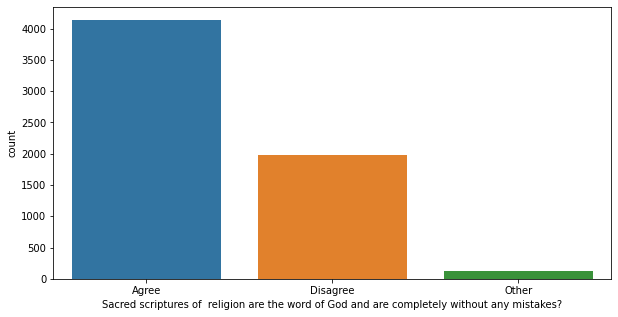

In [8]:
add_health['H1RE2'] = add_health['H1RE2'].astype('category')
add_health['H1RE2'] = add_health['H1RE2'].cat.rename_categories(["Agree", "Disagree", "Other"])
fig, ax = pyplot.subplots()
fig.set_size_inches(9, 4)
seaborn.countplot(add_health['H1RE2'].dropna(), ax=ax)
pyplot.xlabel('Sacred scriptures of  religion are the word of God and are completely without any mistakes?')


Univariant graph for question about believes in sacred scriptures is unimodal and highly skewed to the left, meaning that biggest amount of respondents are religious people and do trust their religions' books.

### How important is Religion in adolescnets lives ?

In [9]:
religion_importance_values = add_health['H1RE4'].value_counts(sort = True, dropna=True)
religion_importance_values_norm = add_health['H1RE4'].value_counts(sort = True, normalize = True, dropna=True)
religion_importance_results = pd.DataFrame({"Count":religion_importance_values, "Normalized Count" : religion_importance_values_norm})
religion_importance_results.at[1, "Description"] = "very important"
religion_importance_results.at[2, "Description"] = "fairly important"
religion_importance_results.at[3, "Description"] = "fairly unimportant"
religion_importance_results.at[4, "Description"] = "not important at all"

religion_importance_results.index = religion_importance_results['Description']
religion_importance_results = religion_importance_results.drop("Description", axis=1)

religion_importance_results

,Count,Normalized Count
Description,,
very important,2812,0.433082
fairly important,2218,0.341599
not important at all,1072,0.165101
fairly unimportant,391,0.060219


Text(0.5, 0, 'How important is religion for me?')

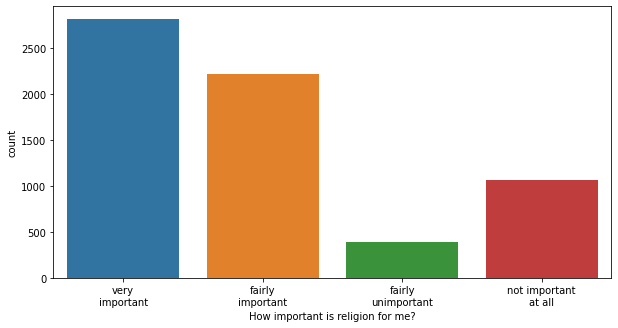

In [10]:
add_health['H1RE4'] = add_health['H1RE4'].astype('category')
add_health['H1RE4'] = add_health['H1RE4'].cat.rename_categories(["very\nimportant", "fairly\nimportant", "fairly\nunimportant", "not important\nat all"])
fig, ax = pyplot.subplots()
fig.set_size_inches(9, 4)
seaborn.countplot(add_health['H1RE4'].dropna(), ax=ax)
pyplot.xlabel('How important is religion for me?')


Graph regarding religion importance is again unimodal and skewed to the left, as most of the respondents declare that religion plays importnat role in their everyday life. 
Together with previous graph it might mean, that as most of the respondents are religious people, trying to compare situation in religious and non-religious families might be complicated, because of huge imbalance in numbers.

In [11]:
praying_freq_values = selected_part['H1RE6'].value_counts(sort = True, dropna=True)
praying_freq_values_norm = selected_part['H1RE6'].value_counts(sort = True, normalize = True, dropna=True)
praying_freq_results = pd.DataFrame({"Count":praying_freq_values, "Normalized Count" : praying_freq_values_norm})

# praying_freq_results

# Understanding in family.
### How much do you feel that people in your family understand you? 

In [12]:
family_understanding_values = add_health['H1PR5'].value_counts(sort = True, dropna=True)
family_understanding_norm = add_health['H1PR5'].value_counts(sort = True, normalize = True, dropna=True)
family_understanding_results = pd.DataFrame({"Count":family_understanding_values, "Normalized Count" : family_understanding_norm})
family_understanding_results.at[1, "Description"] = "not at all"
family_understanding_results.at[2, "Description"] = "very little"
family_understanding_results.at[3, "Description"] = "somewhat"
family_understanding_results.at[4, "Description"] = "quite a bit"
family_understanding_results.at[5, "Description"] = "very much"
# How much do you feel that people in your family understand you?
family_understanding_results.index = family_understanding_results['Description']
family_understanding_results = family_understanding_results.drop("Description", axis=1)
family_understanding_results

,Count,Normalized Count
Description,,
quite a bit,2252,0.347960
somewhat,2054,0.317367
very much,1355,0.209363
very little,624,0.096415
not at all,187,0.028894


Text(0.5, 0, 'How much do you feel that people in your family understand you?')

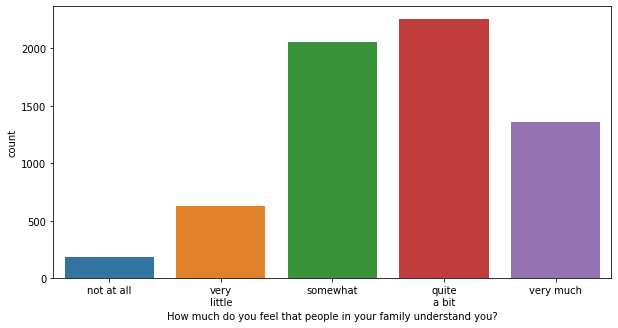

In [13]:
add_health['H1PR5_CAT'] = add_health['H1PR5'].astype('category')
add_health['H1PR5_CAT'] = add_health['H1PR5_CAT'].cat.rename_categories(["not at all", "very\nlittle", "somewhat", "quite\na bit", "very much"])
fig, ax = pyplot.subplots()
fig.set_size_inches(9, 4)
seaborn.countplot(add_health['H1PR5_CAT'].dropna(), ax=ax)
pyplot.xlabel('How much do you feel that people in your family understand you?')


Most of the adolescents, who answered question about understanding in families say, that people in their families understand them, so graph is unimodal and skewed to the right. 

# Independance in family.
### Your mother encourages you to be independent? 

In [14]:
mom_indep_values = add_health['H1PF2'].value_counts(sort = True, dropna=True)
mom_indep_norm = add_health['H1PF2'].value_counts(sort = True, normalize = True, dropna=True)
mom_indep_results = pd.DataFrame({"Count":mom_indep_values, "Normalized Count" : mom_indep_norm})
mom_indep_results.at[1, "Description"] = "strongly agree"
mom_indep_results.at[2, "Description"] = "agree"
mom_indep_results.at[3, "Description"] = "neither agree nor disagree"
mom_indep_results.at[4, "Description"] = "disagree"
mom_indep_results.at[5, "Description"] = "strongly disagree"
mom_indep_results.index = mom_indep_results['Description']
mom_indep_results = mom_indep_results.drop("Description", axis=1)
mom_indep_results

,Count,Normalized Count
Description,,
strongly agree,2600,0.424975
agree,2554,0.417457
neither agree nor disagree,653,0.106734
disagree,249,0.040700
strongly disagree,62,0.010134


Text(0.5, 0, 'Your mother encourages you to be independent?')

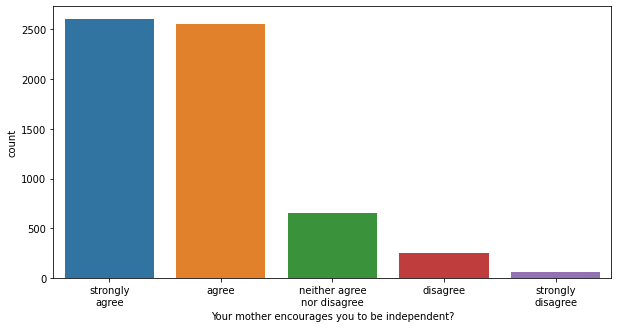

In [15]:
add_health['H1PF2_CAT'] = add_health['H1PF2'].astype('category')
add_health['H1PF2_CAT'] = add_health['H1PF2_CAT'].cat.rename_categories(["strongly\nagree", "agree", "neither agree\nnor disagree", "disagree", "strongly\ndisagree"])
fig, ax = pyplot.subplots()
fig.set_size_inches(9, 4)
seaborn.countplot(add_health['H1PF2_CAT'].dropna(), ax=ax)
pyplot.xlabel('Your mother encourages you to be independent?')

Graph is unimodal, skewed to the right, as most of the respondents answer, that their mothers motivate them to be inpedendent, and only very low percentage disagrees with it

## Combined value of family encoureging to be independant

In [16]:
indep_values = add_health['H1INDCOM'].value_counts(sort = True, dropna=True)
indep_norm = add_health['H1INDCOM'].value_counts(sort = True, normalize = True, dropna=True)
indep_results = pd.DataFrame({"Count":indep_values, "Normalized Count" : indep_norm})
indep_results.at[1, "Description"] = "Yes"
indep_results.at[0, "Description"] = "No"
indep_results.index = indep_results['Description']
indep_results = indep_results.drop("Description", axis=1)
indep_results

,Count,Normalized Count
Description,,
Yes,4496,0.691267
No,2008,0.308733


Text(0.5, 0, 'Your family encourages you to be independent?')

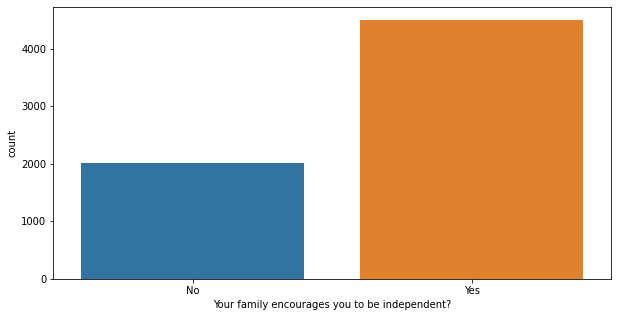

In [17]:
add_health['H1INDCOM_CAT'] = add_health['H1INDCOM'].astype('category')
add_health['H1INDCOM_CAT'] = add_health['H1INDCOM_CAT'].cat.rename_categories(["No", "Yes"])
fig, ax = pyplot.subplots()
fig.set_size_inches(9, 4)
seaborn.countplot(add_health['H1INDCOM_CAT'].dropna(), ax=ax)
pyplot.xlabel('Your family encourages you to be independent?')

Text(6.799999999999997, 0.5, 'Combined independance in family')

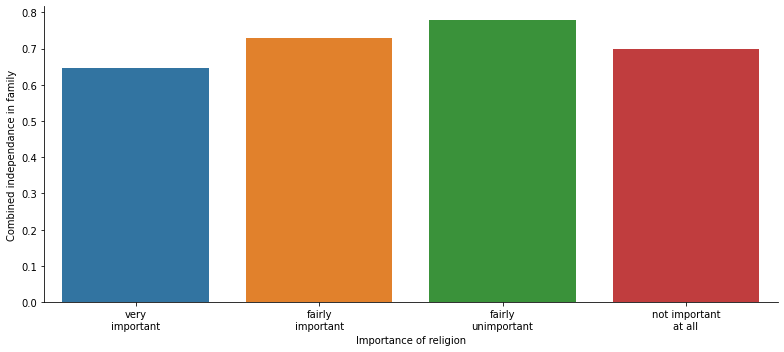

In [18]:
add_health['H1RE4'] = add_health['H1RE4'].astype('category')
add_health['H1INDCOM'] = pd.to_numeric(add_health['H1INDCOM'])

add_health['H1RE4']=add_health['H1RE4'].cat.rename_categories(["very\nimportant", "fairly\nimportant", "fairly\nunimportant", "not important\nat all"])
seaborn.catplot(x='H1RE4', y='H1INDCOM', data=add_health, kind="bar", ci=None, height=4, aspect=10/4)
pyplot.xlabel('Importance of religion')
pyplot.ylabel('Combined independance in family')


Text(6.799999999999997, 0.5, 'Mom encouraging to be independent')

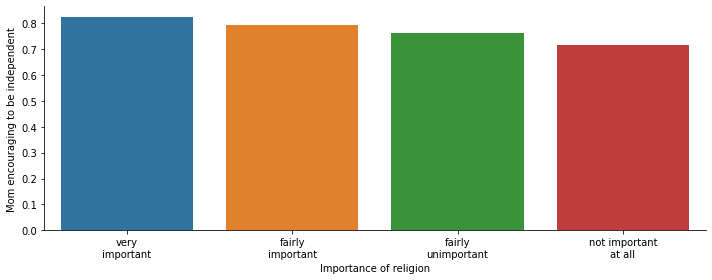

In [21]:

add_health['MOMIND'] = np.where(add_health['H1PF2'] < 3, 1, 0)
# add_health['MOMIND'] = add_health['MOMIND'].convert_objects(convert_numeric=True)

seaborn.catplot(x='H1RE4', y='MOMIND', data=add_health, kind="bar", ci=None, height=4, aspect=10/4)
pyplot.xlabel('Importance of religion')
pyplot.ylabel('Mom encouraging to be independent')


Text(6.799999999999997, 0.5, 'Family overall understands me')

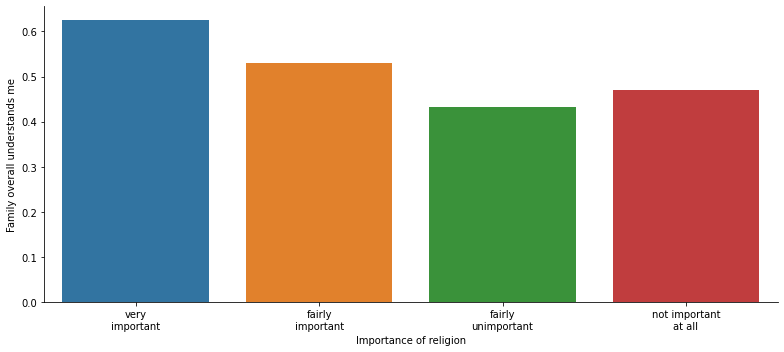

In [20]:
add_health['UNDERST'] = np.where(add_health['H1PR5'] > 3, 1, 0)
seaborn.catplot(x='H1RE4', y='UNDERST', data=add_health, kind="bar", ci=None, height=4, aspect=10/4)
pyplot.xlabel('Importance of religion')
pyplot.ylabel('Family overall understands me')


Although most of those for whome religion is somewhat important answered, that their families tend to understand them, it's too early to make any assumpations about correlation of these variables.

The only bivariate graph is the one showing dependency between religion and overall independence in family. Others are almost uniform distributions, which might mean, that there's no strong correlation between religion and encouraging adolescents to be independent. 